<a href="https://colab.research.google.com/github/22MANAV22/Topsis-for-Pretrained-Models/blob/main/Topsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


📌 TOPSIS Ranking Table 📌

   Rank            Model  TOPSIS Score
0     1          ChatGPT      0.528298
1     2            GPT-4      0.518082
2     3       BlenderBot      0.481918
3     4  T5 (fine-tuned)      0.425482
4     5         DialoGPT      0.405498

✅ Results saved as 'topsis_conversational_ai_results.csv'


<ipython-input-1-e94a2c3be327>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df["TOPSIS Score"], y=results_df["Model"], palette="coolwarm", edgecolor="black")


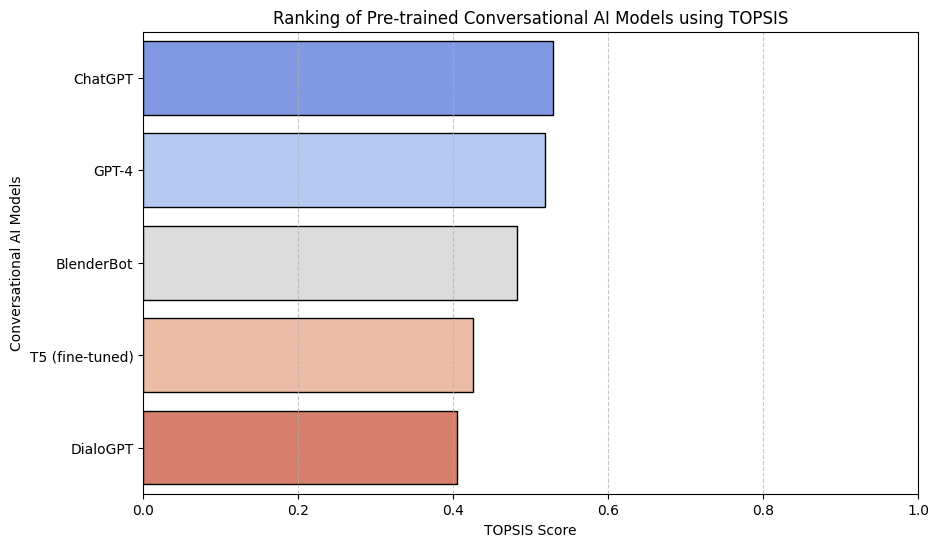

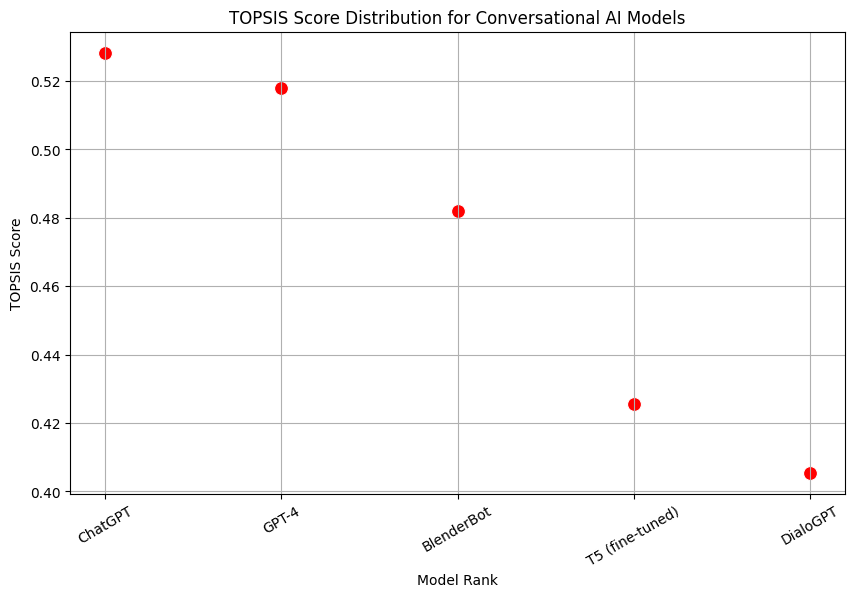

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define conversational AI models and evaluation criteria
models = ["GPT-4", "ChatGPT", "DialoGPT", "T5 (fine-tuned)", "BlenderBot"]
criteria = ["Accuracy", "Fluency", "Response Time", "Coherence", "Computational Cost"]

# Step 2: Decision Matrix (Example Scores: Higher is better except Response Time & Cost)
decision_matrix = np.array([
    [0.95, 0.90, 1.2, 0.92, 0.8],  # GPT-4
    [0.92, 0.88, 1.4, 0.89, 0.75], # ChatGPT
    [0.85, 0.82, 1.6, 0.80, 0.65], # DialoGPT
    [0.80, 0.78, 1.9, 0.75, 0.60], # T5
    [0.78, 0.76, 2.2, 0.72, 0.55]  # BlenderBot
])

# Step 3: Define Weights for Criteria
weights = np.array([0.3, 0.25, 0.15, 0.2, 0.1])  # Adjust as needed

# Step 4: Normalize the Decision Matrix
norm_matrix = decision_matrix / np.sqrt((decision_matrix ** 2).sum(axis=0))

# Step 5: Multiply by Weights
weighted_matrix = norm_matrix * weights

# Step 6: Identify Ideal Best and Ideal Worst
ideal_best = np.max(weighted_matrix, axis=0)  # Maximum for benefit criteria
ideal_worst = np.min(weighted_matrix, axis=0) # Minimum for cost criteria

# Step 7: Compute Separation Measures
distance_best = np.sqrt(((weighted_matrix - ideal_best) ** 2).sum(axis=1))
distance_worst = np.sqrt(((weighted_matrix - ideal_worst) ** 2).sum(axis=1))

# Step 8: Compute TOPSIS Score
topsis_score = distance_worst / (distance_best + distance_worst)

# Step 9: Rank the Models
ranking = np.argsort(topsis_score)[::-1]  # Sort in descending order

# Step 10: Create DataFrame for Results
results_df = pd.DataFrame({
    "Rank": np.arange(1, len(models) + 1),
    "Model": np.array(models)[ranking],
    "TOPSIS Score": topsis_score[ranking]
})

# Step 11: Print the Table
print("\n📌 TOPSIS Ranking Table 📌\n")
print(results_df)

# Step 12: Save Results to CSV for GitHub Upload
results_df.to_csv("topsis_conversational_ai_results.csv", index=False)
print("\n✅ Results saved as 'topsis_conversational_ai_results.csv'")

# Step 13: Visualization - Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df["TOPSIS Score"], y=results_df["Model"], palette="coolwarm", edgecolor="black")
plt.xlabel("TOPSIS Score")
plt.ylabel("Conversational AI Models")
plt.title("Ranking of Pre-trained Conversational AI Models using TOPSIS")
plt.xlim(0, 1)  # Scores range from 0 to 1
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Step 14: Visualization - Scatter Plot for Performance Comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(x=results_df["Rank"], y=results_df["TOPSIS Score"], s=100, color="red", marker="o")
plt.xticks(results_df["Rank"], results_df["Model"], rotation=30)
plt.xlabel("Model Rank")
plt.ylabel("TOPSIS Score")
plt.title("TOPSIS Score Distribution for Conversational AI Models")
plt.grid(True)
plt.show()
